In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [724]:
panel= pd.read_csv('panel.csv')
panel['annee'] = pd.to_datetime(panel['annee'], format='%Y')  # Assurez-vous que 'year' est au format datetime si ce n'est pas déjà le cas.
panel = panel.set_index(['siren', 'annee'])
panel = panel.dropna(subset=['CIR'])
panel['division'] = panel['division'].astype(str)
panel_filtre = panel[panel['division'] != 72]
panel['CIR'] = panel['CIR']* 10**(-6)
panel

,,Unnamed: 0,division,CIR,nb_brevets,Id_ETI,annee_creation
siren,annee,,,,,,
300170669,2016-01-01,0,95,0.0,0.0,1,1973
300400207,2016-01-01,1,32,0.0,0.0,1,1967
300433935,2016-01-01,2,22,0.0,0.0,1,1974
300560588,2016-01-01,3,20,0.0,6.0,1,1900
300601648,2016-01-01,4,32,0.0,0.0,1,1973
...,...,...,...,...,...,...,...
970507174,2023-01-01,19035,29,0.0,0.0,0,1970
971502448,2023-01-01,19036,72,0.0,0.0,0,1900
971509070,2023-01-01,19037,20,0.0,0.0,0,1971


In [725]:
panel=panel[panel['CIR']>0]
panel=panel[panel['nb_brevets']>0 ]

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

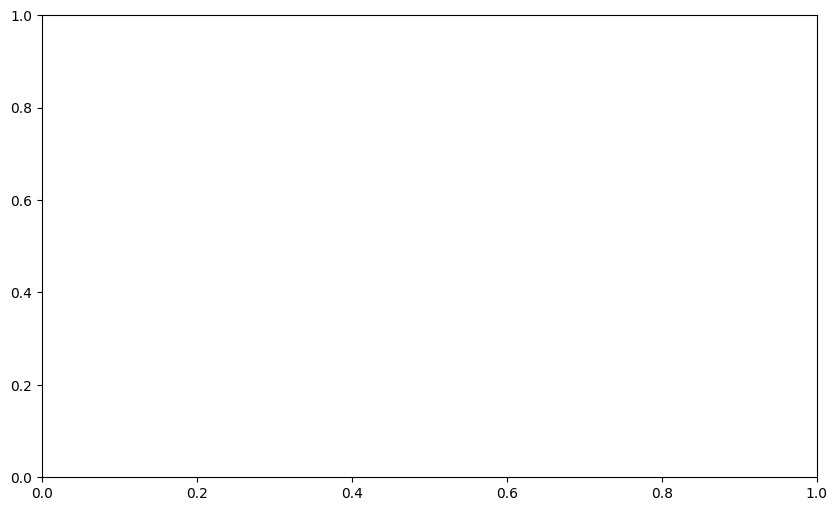

In [726]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(panel['CIR'], panel['nb_brevets'], color='division', alpha=0.6)
plt.title('CIR vs. Number of Patents')
plt.xlabel('CIR')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs
palette = sns.color_palette("tab10", len(panel['division'].unique()))

# Créer un dictionnaire pour mapper chaque division à une couleur
division_colors = {division: palette[i] for i, division in enumerate(panel['division'].unique())}

# Appliquer la couleur correspondante pour chaque point en fonction de la division
plt.figure(figsize=(10, 6))
for division in panel['division'].unique():
    subset = panel[panel['division'] == division]
    plt.subplot(subset['CIR'], subset['nb_brevets'], label=division, color=division_colors[division], alpha=0.6)

# Ajouter des titres et des légendes
plt.title('CIR vs. Number of Patents by Division')
plt.xlabel('CIR')
plt.ylabel('Number of Patents')
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende des divisions
plt.grid(True)
plt.show()

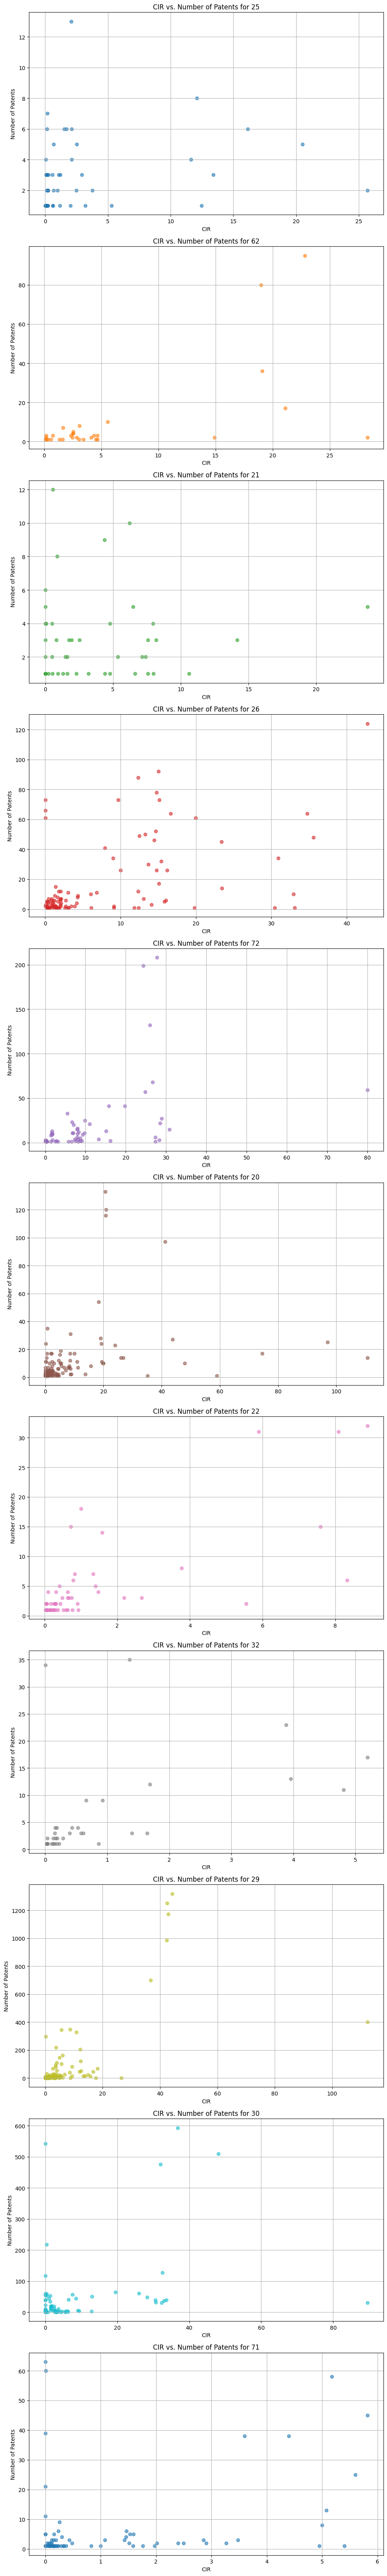

In [727]:
# Créer une palette de couleurs
palette = sns.color_palette("tab10", len(panel['division'].unique()))

# Déterminer le nombre de divisions uniques
unique_divisions = panel['division'].unique()

# Créer un sous-graphe pour chaque division
fig, axes = plt.subplots(len(unique_divisions), 1, figsize=(10, 6 * len(unique_divisions)))

# S'assurer que axes est une liste si nous n'avons qu'un seul graphique
if len(unique_divisions) == 1:
    axes = [axes]

# Tracer les données pour chaque division
for i, division in enumerate(unique_divisions):
    ax = axes[i]
    subset = panel[panel['division'] == division]
    
    ax.scatter(subset['CIR'], subset['nb_brevets'], color=palette[i], alpha=0.6)
    ax.set_title(f'CIR vs. Number of Patents for {division}')
    ax.set_xlabel('CIR')
    ax.set_ylabel('Number of Patents')
    ax.grid(True)

# Ajuster les sous-graphiques
plt.tight_layout()
plt.show()

**Regression en prenant en compte les effets fixes pour toutes les entreprises**

In [728]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
#Exemple de préparation des données
panel ['annee'] = panel.index.get_level_values('annee').astype(str)
panel ['siren'] = panel.index.get_level_values('siren').astype(str)
panel ['division_annee'] = panel['division'] + panel ['annee']

In [729]:

model = PanelOLS.from_formula('np.log(1 + nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel)
results = model.fit()
print(results)

                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                        0.0412
Estimator:                       PanelOLS   R-squared (Between):              0.0832
No. Observations:                     753   R-squared (Within):               0.0383
Date:                    Wed, Nov 20 2024   R-squared (Overall):              0.0907
Time:                            09:43:46   Log-likelihood                   -461.36
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      21.384
Entities:                             248   P-value                           0.0000
Avg Obs:                           3.0363   Distribution:                   F(1,498)
Min Obs:                           1.0000                                           
Max Obs:                           7.0000   F-statistic (robust):

**Regression cette fois en ne prenant pas les entreprises du secteur 72**

In [730]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
#Exemple de préparation des données

model = PanelOLS.from_formula('np.log(1 + nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel_filtre)
results = model.fit()
print(results)

                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                        0.0048
Estimator:                       PanelOLS   R-squared (Between):              0.0440
No. Observations:                   19040   R-squared (Within):               0.0045
Date:                    Wed, Nov 20 2024   R-squared (Overall):              0.0321
Time:                            09:43:46   Log-likelihood                   -2405.5
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      80.892
Entities:                            2380   P-value                           0.0000
Avg Obs:                           8.0000   Distribution:                 F(1,16652)
Min Obs:                           8.0000                                           
Max Obs:                           8.0000   F-statistic (robust):

**Regression par catégorie d'entreprises**

In [731]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
# Filtrer les données pour les ETI et GE
panel_eti = panel[panel['Id_ETI'] == 1]
panel_ge = panel[panel['Id_ETI'] == 0]

# Modèle pour les ETI
model_eti = PanelOLS.from_formula('np.log(1+nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel_eti)
results_eti = model_eti.fit()

# Modèle pour les GE
model_ge = PanelOLS.from_formula('np.log(1+nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel_ge)
results_ge = model_ge.fit()

# Afficher les résultats
print("Résultats pour les ETI :")
print(results_eti)

print("Résultats pour les GE :")
print(results_ge)

Résultats pour les ETI :
                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                        0.0018
Estimator:                       PanelOLS   R-squared (Between):              0.0254
No. Observations:                     420   R-squared (Within):               0.0023
Date:                    Wed, Nov 20 2024   R-squared (Overall):              0.0266
Time:                            09:43:46   Log-likelihood                   -178.48
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      0.4381
Entities:                             164   P-value                           0.5087
Avg Obs:                           2.5610   Distribution:                   F(1,249)
Min Obs:                           1.0000                                           
Max Obs:                           7.000

**On ne prend plus en compte les fixed effect des siren mais on veut voir l'influence de la catégorie d'entreprise**

In [732]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
#Exemple de préparation des données
#panel['annee'] = pd.to_datetime(panel['annee'], format='%Y')  # Assurez-vous que 'year' est au format datetime si ce n'est pas déjà le cas.
#panel = panel.set_index(['siren', 'annee'])
model = PanelOLS.from_formula('nb_brevets~ CIR + C(Id_ETI,Treatment(1))+ annee_creation+C(division,Treatment("72") ) + C(annee)', data=panel)
results = model.fit()
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:             nb_brevets   R-squared:                        0.2344
Estimator:                   PanelOLS   R-squared (Between):              0.2146
No. Observations:                 753   R-squared (Within):               0.0027
Date:                Wed, Nov 20 2024   R-squared (Overall):              0.2344
Time:                        09:43:47   Log-likelihood                   -4461.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      11.814
Entities:                         248   P-value                           0.0000
Avg Obs:                       3.0363   Distribution:                  F(19,733)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             14.892
                            

**Ajout de termes d'interaction**
- interaction CIR et Id_ETI

In [733]:
model = PanelOLS.from_formula('np.log(1+nb_brevets) ~1 +CIR + CIR * C(Id_ETI,Treatment(1))+ annee_creation+C(division,Treatment("72") ) + TimeEffects', data=panel)
results = model.fit()
print(results)

                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                        0.4229
Estimator:                       PanelOLS   R-squared (Between):              0.3682
No. Observations:                     753   R-squared (Within):              -0.0083
Date:                    Wed, Nov 20 2024   R-squared (Overall):              0.3793
Time:                            09:43:48   Log-likelihood                   -1047.4
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      38.310
Entities:                             248   P-value                           0.0000
Avg Obs:                           3.0363   Distribution:                  F(14,732)
Min Obs:                           1.0000                                           
Max Obs:                           7.0000   F-statistic (robust):

# Regressions sur panel final

In [941]:
panel_237 = pd.read_csv('panel_database238.csv')
panel_237

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti
0,300560588,20,1900,2016,6.0,0.00,1
1,302456199,62,1985,2016,1.0,3439257.00,1
2,304849094,71,1982,2016,0.0,32280.87,1
3,305151409,21,1900,2016,4.0,7946000.00,1
4,306926684,26,1976,2016,0.0,0.00,1
...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.00,1
1181,790503973,62,2013,2020,0.0,149519.00,0
1182,791567092,22,2013,2020,0.0,828108.00,1
1183,796380426,25,1963,2020,0.0,515000.00,1


In [942]:
panel_237['CIR'] = panel_237['CIR']/1000000
panel_237 ['RetD'] = panel_237['CIR'].apply(lambda x: x / 0.3 if x <= 30 else (x - 25) / 0.05)
panel_237['division'] = panel_237['division'].astype(str)
panel_237['idEti'] = panel_237['idEti'].astype(str)
panel_237

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD
0,300560588,20,1900,2016,6.0,0.000000,1,0.000000
1,302456199,62,1985,2016,1.0,3.439257,1,11.464190
2,304849094,71,1982,2016,0.0,0.032281,1,0.107603
3,305151409,21,1900,2016,4.0,7.946000,1,26.486667
4,306926684,26,1976,2016,0.0,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667


In [943]:
max_cir_row = panel_218.loc[panel_218['CIR'].idxmax()]

# Afficher la ligne
print(max_cir_row)

siren                      441133808
division                          30
dateCreationUniteLegale         2002
annee                           2019
brevets                           30
CIR                             89.5
idEti                              0
RetD                          1290.0
RetD_CF                        903.0
RetD_t_1                   94.283333
Name: 831, dtype: object


In [944]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.432
Model:                             OLS   Adj. R-squared:                  0.419
Method:                  Least Squares   F-statistic:                     32.64
Date:                 Wed, 20 Nov 2024   Prob (F-statistic):          3.66e-122
Time:                         17:54:54   Log-Likelihood:                -1729.1
No. Observations:                 1185   AIC:                             3514.
Df Residuals:                     1157   BIC:                             3656.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [945]:
from tabulate import tabulate
# Extraire les coefficients, les erreurs standards, les valeurs t et p
# Extraire uniquement certains coefficients
summary_data = [
    ("Dependent Variable", result.model.endog_names),
    ("R-squared", f"{result.rsquared:.3f}"),
    ("Adjusted R-squared", f"{result.rsquared_adj:.3f}"),
    # Ajoutez ou commentez les lignes selon les besoins
    ("Model", "OLS"),
    ("No. Observations", int(result.nobs)),
    ("F-statistic", f"{result.fvalue:.2f}"),
    ("Prob (F-statistic)", f"{result.f_pvalue:.2e}"),
]

desired_variables = ["RetD", 'Intercept', 'C(division, Treatment("72"))[T.30]', 'C(division, Treatment("72")','C(division, Treatment("72"))[T.32]', 'C(division, Treatment("72"))[T.71]', 'RetD:C(division, Treatment("72"))[T.32]', 'RetD:C(division, Treatment("72"))[T.30]', 'RetD:C(division, Treatment("72"))[T.71]', 'idEti[T.1]','RetD:idEti[T.1]', 'C(idEti, Treatment("1"))[T.0]']  # Liste des variables souhaitées
coeff_summary = [
    (param, f"{coef:.4f}", f"{std_err:.4f}", f"{p_val:.4f}")
    for param, coef, std_err, p_val in zip(result.params.index, result.params, result.bse, result.pvalues)
    if any(variable == param for variable in desired_variables)
]

# Afficher les tableaux formatés avec les paramètres sélectionnés
print("\nModel Summary:")
print(tabulate(summary_data, headers=["Metric", "Value"], tablefmt="pretty"))
print("\nCoefficients:")
print(tabulate(coeff_summary, headers=["Variable", "Coefficient", "Std. Error", "P-value"], tablefmt="pretty"))


Model Summary:
+--------------------+---------------------+
|       Metric       |        Value        |
+--------------------+---------------------+
| Dependent Variable | np.log(1 + brevets) |
|     R-squared      |        0.432        |
| Adjusted R-squared |        0.419        |
|       Model        |         OLS         |
|  No. Observations  |        1185         |
|    F-statistic     |        32.64        |
| Prob (F-statistic) |      3.66e-122      |
+--------------------+---------------------+

Coefficients:
+-----------------------------------------+-------------+------------+---------+
|                Variable                 | Coefficient | Std. Error | P-value |
+-----------------------------------------+-------------+------------+---------+
|                Intercept                |   2.4456    |   2.7331   | 0.3711  |
|   C(division, Treatment("72"))[T.30]    |   0.9256    |   0.1747   | 0.0000  |
|   C(division, Treatment("72"))[T.32]    |   -0.2329   |   0.1906   

In [947]:
panel_237['RetD_CF'] =panel_237['RetD']-panel_237['CIR']
# Créez une copie du DataFrame original
data_for_prediction = panel_237.copy()

# Remplacez la colonne 'RetD' par les valeurs de 'RetD_CF'
data_for_prediction['RetD'] = data_for_prediction['RetD_CF']

# Faites les prédictions avec le modèle en utilisant cette version modifiée des données
predictions = result.predict(data_for_prediction)
#panel_2018['nb_brevets_predits']
data_for_prediction['nb_brevets_CF'] = predictions
data_for_prediction['nb_brevets_CF'] = np.exp(data_for_prediction['nb_brevets_CF'])-1
# Affichez les prédictions
data_for_prediction

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF,nb_brevets_CF
0,300560588,20,1900,2016,6.0,0.000000,1,0.000000,0.000000,1.928162
1,302456199,62,1985,2016,1.0,3.439257,1,8.024933,8.024933,0.454218
2,304849094,71,1982,2016,0.0,0.032281,1,0.075322,0.075322,0.400806
3,305151409,21,1900,2016,4.0,7.946000,1,18.540667,18.540667,1.651767
4,306926684,26,1976,2016,0.0,0.000000,1,0.000000,0.000000,2.157840
...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,-0.057433
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.348878,0.952253
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,1.932252,0.770410
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.201667,0.384816


In [948]:
data_for_prediction ['delta_nb_brevets'] =-(data_for_prediction['nb_brevets_CF']- data_for_prediction['brevets'])

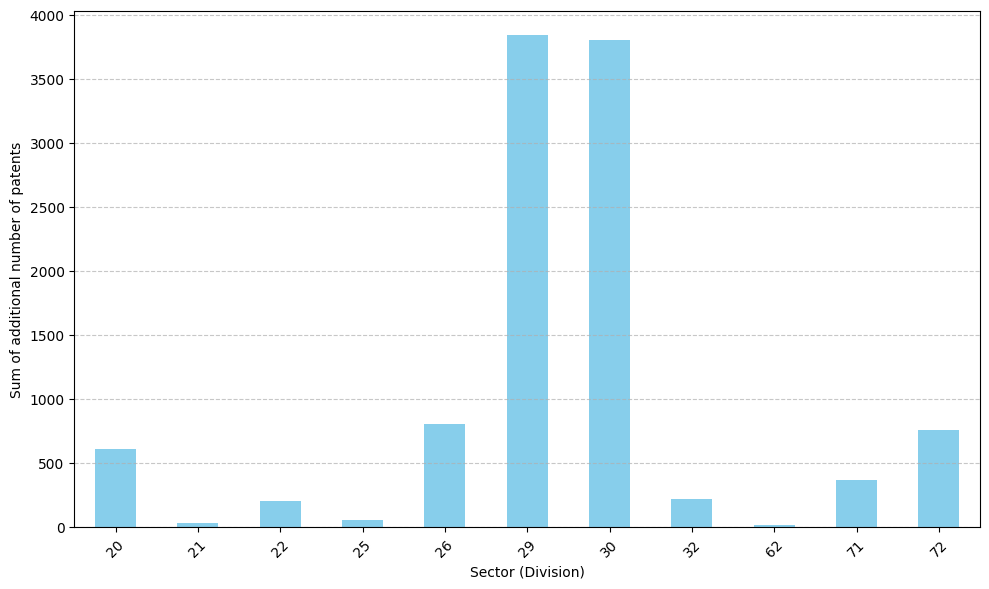

In [949]:
df_final = data_for_prediction.groupby('division')['delta_nb_brevets'].sum()
import matplotlib.pyplot as plt

# Créer un bar chart pour afficher la somme de delta_nb_brevets par secteur
plt.figure(figsize=(10, 6))
df_final.plot(kind='bar', color='skyblue')  # Utilisation d'un bar chart
plt.xlabel('Sector (Division)')
plt.ylabel('Sum of additional number of patents')
plt.xticks(rotation=45)  # Rotation des labels des secteurs pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter des lignes de grille
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

In [950]:
# Calculer la somme de CIR et delta_nb_brevets par siren
sums_by_siren = data_for_prediction.groupby('siren')[['CIR', 'delta_nb_brevets']].sum()

# Afficher les résultats
sums_by_siren

,CIR,delta_nb_brevets
siren,,
300560588,0.692881,4.448221
302456199,4.251904,1.060927
304849094,0.364906,1.464190
305151409,59.904000,5.417245
306926684,0.750000,-6.446453
...,...,...
871500229,0.098259,4.709736
897080289,23.620405,26.539520
950020180,0.541326,-0.735770


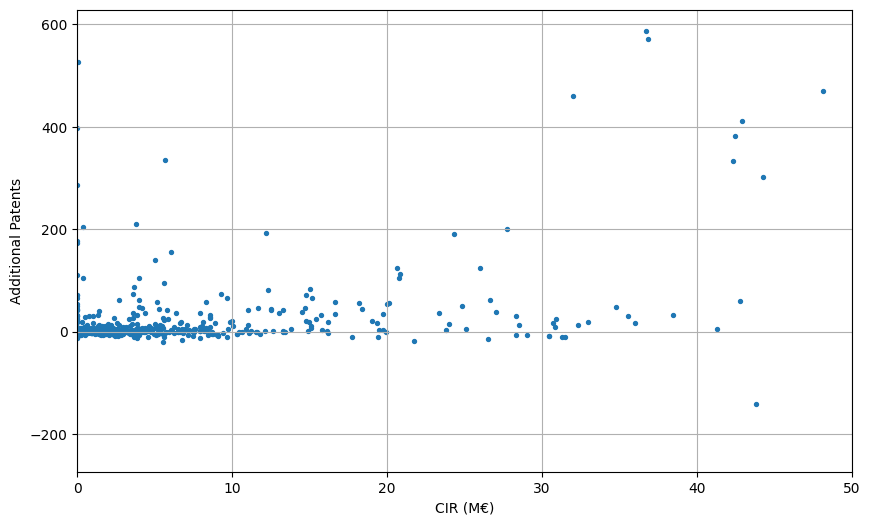

In [957]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction['CIR'], data_for_prediction['delta_nb_brevets'], s=8)

plt.xlabel('CIR (M€)')
plt.ylabel('Additional Patents')
plt.xlim(0, 50)  # Limite pour l'axe des X
plt.grid(True)
plt.show()

In [958]:
data_for_prediction['brevets'].sum()

18650.0

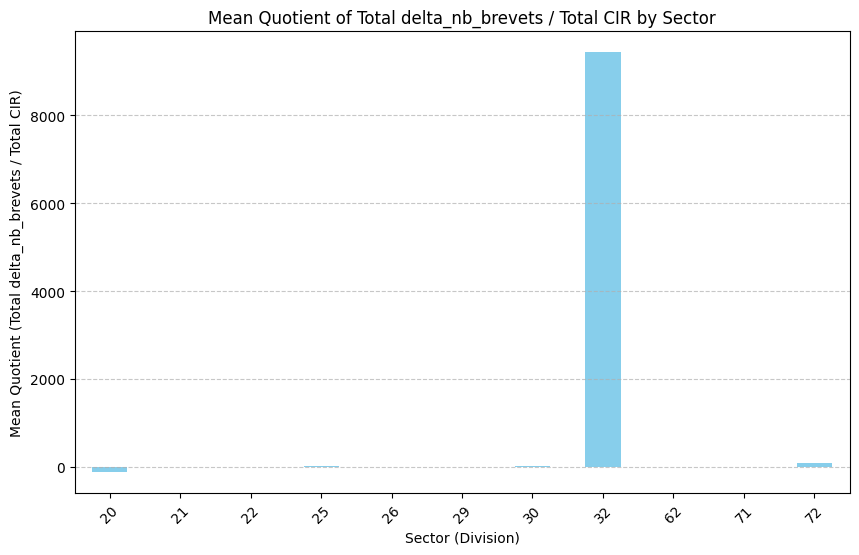

In [959]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels=32, errors='ignore')
# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels='32', errors='ignore')
# Étape 4 : Représenter la moyenne par secteur avec un bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_quotient_by_sector.plot(kind='bar', color='skyblue')
plt.title("Mean Quotient of Total delta_nb_brevets / Total CIR by Sector")
plt.xlabel("Sector (Division)")
plt.ylabel("Mean Quotient (Total delta_nb_brevets / Total CIR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [960]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+---------------------+
| division |    mean_quotient    |
+----------+---------------------+
|    20    | -125.7054446971476  |
|    21    | -12.182109038671438 |
|    22    | -2.9774734076393155 |
|    25    |  9.315987346764564  |
|    26    | 0.14775297349571626 |
|    29    | -0.8692415820211358 |
|    30    |  30.2856568291253   |
|    32    |  9436.07181535451   |
|    62    | -1.5346815691483149 |
|    71    | -6.714559111637122  |
|    72    |  92.62375895639934  |
+----------+---------------------+


In [910]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+---------------------+
| Id_ETI |    mean_quotient    |
+--------+---------------------+
|   0    | 1591.4741696816295  |
|   1    | -3.9205291955005612 |
+--------+---------------------+


In [911]:
panel_218

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF
0,300560588,20,1900,2016,6,0.000000,1,0.000000,0.000000
1,302456199,62,1985,2016,1,3.439257,1,11.464190,8.024933
2,304849094,71,1982,2016,0,0.032281,1,0.107603,0.075322
3,305151409,21,1900,2016,4,7.946000,1,26.486667,18.540667
4,306926684,26,1976,2016,0,0.000000,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3,0.000000,1,0.000000,0.000000
1181,790503973,62,2013,2020,0,0.149519,0,0.498397,0.348878
1182,791567092,22,2013,2020,0,0.828108,1,2.760360,1.932252
1183,796380426,25,1963,2020,0,0.515000,1,1.716667,1.201667


In [912]:
# 1. Décaler `CIR` de 1 an pour chaque `siren` en utilisant l'index multi-niveau
panel_218['RetD_t_1'] = panel_218.groupby('siren')['RetD'].shift(1)
# 2. Supprimer les lignes avec des valeurs manquantes dans `CIR_t_1` et `nb_brevets`
panel_218= panel_218.dropna(subset=['RetD_t_1', 'brevets'])

In [913]:
panel_218

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF,RetD_t_1
237,300560588,20,1900,2017,3,0.368934,1,1.229780,0.860846,0.000000
238,302456199,62,1985,2017,0,0.812647,1,2.708823,1.896176,11.464190
239,304849094,71,1982,2017,0,0.097396,1,0.324653,0.227257,0.107603
240,305151409,21,1900,2017,5,23.777000,1,79.256667,55.479667,26.486667
241,306926684,26,1976,2017,1,0.000000,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3,0.000000,1,0.000000,0.000000,0.000000
1181,790503973,62,2013,2020,0,0.149519,0,0.498397,0.348878,0.613363
1182,791567092,22,2013,2020,0,0.828108,1,2.760360,1.932252,3.344493
1183,796380426,25,1963,2020,0,0.515000,1,1.716667,1.201667,2.723333


In [914]:
panel_218['brevets']

237      3
238      0
239      0
240      5
241      1
        ..
1180     3
1181     0
1182     0
1183     0
1184    11
Name: brevets, Length: 948, dtype: int64

In [915]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD_t_1 +RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_218)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.453
Model:                             OLS   Adj. R-squared:                  0.436
Method:                  Least Squares   F-statistic:                     28.16
Date:                 Wed, 20 Nov 2024   Prob (F-statistic):          3.14e-101
Time:                         16:05:50   Log-Likelihood:                -1347.8
No. Observations:                  948   AIC:                             2752.
Df Residuals:                      920   BIC:                             2887.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Coefficient négatif car de plus en plus diff de faire de la R&D. 
Interet du CIR pour les boites qui se lancent dans la R&D. 

In [771]:
df_above_100_CIR = panel[panel['CIR'] > 100]

# Afficher le résultat
len(df_above_100_CIR)

1

In [772]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
# Filtrer les données pour les ETI et GE
panel_eti = panel[panel['Id_ETI'] == 1]
panel_ge = panel[panel['Id_ETI'] == 0]

# Modèle pour les ETI
model_eti = PanelOLS.from_formula('nb_brevets ~ CIR + CIR_t_1+CIR_t_2+ EntityEffects + TimeEffects', data=panel_eti)
results_eti = model_eti.fit()

# Modèle pour les GE
model_ge = PanelOLS.from_formula('nb_brevets ~ CIR + CIR_t_1+CIR_t_2+ EntityEffects + TimeEffects', data=panel_ge)
results_ge = model_ge.fit()

# Afficher les résultats
print("Résultats pour les ETI :")
print(results_eti)

print("Résultats pour les GE :")
print(results_ge)

FactorEvaluationError: Unable to evaluate factor `CIR_t_2`. [NameError: `CIR_t_2` is not present in the dataset or evaluation context.]

In [573]:
df = pd.read_csv('presque_fini.csv')
df

,Unnamed: 0.1,Unnamed: 0,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,Id_ETI,dateCreationUniteLegale,division
0,0,0,300170669,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1,1973,95
1,1,1,300400207,0.0,0.0,0.0,0.0,0.0,0.00,0.0,26214.40,0.0,0.0,1,1967,32
2,2,2,300433935,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1,1974,22
3,3,3,300560588,6.0,3.0,1.0,0.0,1.0,0.00,368934.0,323947.00,0.0,0.0,1,1900,20
4,4,4,300601648,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1,1973,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2588,2588,970507174,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0,1970,29
2589,2589,2589,971502448,0.0,0.0,0.0,0.0,0.0,15446961.00,16223000.0,16543000.00,0.0,0.0,0,1900,72
2590,2590,2590,971509070,24.0,11.0,11.0,10.0,11.0,209119.27,0.0,231619.95,0.0,212018.0,0,1971,20
2591,2591,2591,972506075,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1,1900,71


In [574]:
# Convertir la colonne 'siren' en chaîne de caractères si ce n'est pas déjà le cas
df['siren'] = df['siren'].astype(str)

# Filtrer les entreprises ayant un SIREN de 8 chiffres
df_siren_8_digits = df[df['siren'].str.len() == 8]

In [575]:
df_siren_8_digits

,Unnamed: 0.1,Unnamed: 0,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,Id_ETI,dateCreationUniteLegale,division
